In [2]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
import pydicom
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import cv2
import numpy as np

C:\Users\LEEPAAKSHI\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
train.head()

NameError: name 'train' is not defined

In [3]:
train = pd.read_csv("D:/DATASET/train.csv")

<AxesSubplot:>

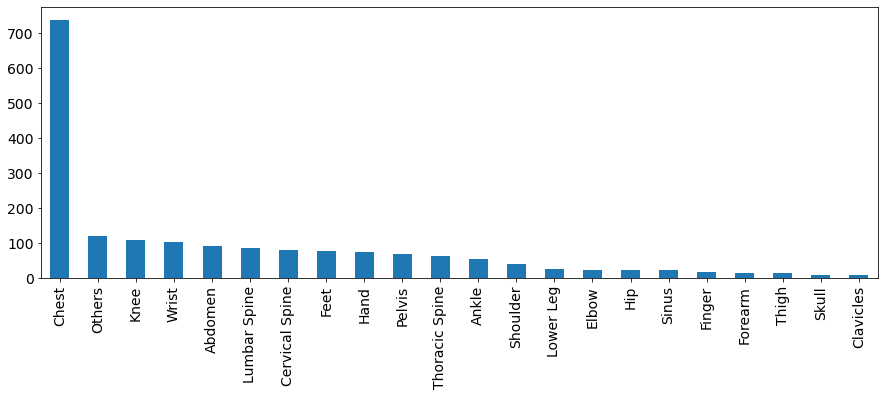

In [4]:
bodyparts = {
0 : 'Abdomen' ,
1 :'Ankle' ,
2 :'Cervical Spine',
3 : 'Chest' ,
4 :'Clavicles' ,
5 :'Elbow' ,
6 :'Feet' ,
7 : 'Finger' ,
8 : 'Forearm' ,
9 : 'Hand' ,
10 : 'Hip' ,
11 : 'Knee' ,
12 : 'Lower Leg' ,
13 : 'Lumbar Spine' ,
14 : 'Others' ,
15 :'Pelvis',
16 :'Shoulder' ,
17 :'Sinus' ,
18 : 'Skull' ,
19 : 'Thigh' ,
20 :'Thoracic Spine',
21: 'Wrist',
}

labels_num = [value.split() for value in train['Target']]
labels_num_flat = list(map(int, [item for sublist in labels_num for item in sublist]))
labels = ["" for _ in range(len(labels_num_flat))]
for i in range(len(labels_num_flat)):
    labels[i] = bodyparts[labels_num_flat[i]]

fig, ax = plt.subplots(figsize=(15, 5))
pd.Series(labels).value_counts().plot(kind = 'bar', fontsize=14)

In [5]:
def dcmtag2table(folder, list_of_tags):
    """
    # Create a Pandas DataFrame with the <list_of_tags> DICOM tags
    # from the DICOM files in <folder>
    # Parameters:
    #    folder (str): folder to be recursively walked looking for DICOM files.
    #    list_of_tags (list of strings): list of DICOM tags with no whitespaces.
    # Returns:
    #    df (DataFrame): table of DICOM tags from the files in folder.
    """
    list_of_tags = list_of_tags.copy()
    items = []
    table = []
    filelist = []
    print("Listing all files...")
    start = time.time()
    for root, dirs, files in os.walk(folder, topdown=False):
        for name in files:
            filelist.append(os.path.join(root, name))
        print("Time: " + str(time.time() - start))
    print("Reading files...")
    time.sleep(2)
    for _f in tqdm(filelist):
        try:
            ds = pydicom.dcmread(_f, stop_before_pixels=True)
            items = []
            items.append(_f)

            for _tag in list_of_tags:
                if _tag in ds:
                    items.append(ds.data_element(_tag).value)
                else:
                    items.append("Not found")

            table.append((items))
        except:
            print("Skipping non-DICOM: " + _f)

            
    list_of_tags.insert(0, "Filename")
    test = list(map(list, zip(*table)))
    dictone = {}

    for i, _tag in enumerate (list_of_tags):
        dictone[_tag] = test[i]

    df = pd.DataFrame(dictone)
    time.sleep(2)
    print("Finished.")
    return df

In [6]:
tags = ['PhotometricInterpretation','BitsAllocated', 'SOPInstanceUID' ]
dicom_tags_train =  dcmtag2table('D:/DATASET/train', tags)

Listing all files...
Time: 0.034163713455200195
Time: 0.034163713455200195
Time: 0.034163713455200195
Time: 0.06065034866333008
Time: 0.061080217361450195
Time: 0.061080217361450195
Time: 0.06880831718444824
Time: 0.06880831718444824
Time: 0.06880831718444824
Time: 0.07822704315185547
Time: 0.08022642135620117
Time: 0.08022642135620117
Time: 0.08911967277526855
Time: 0.09686136245727539
Time: 0.09686136245727539
Time: 0.09686136245727539
Time: 0.11226701736450195
Time: 0.11226701736450195
Time: 0.11226701736450195
Time: 0.12798833847045898
Time: 0.13514328002929688
Time: 0.1410970687866211
Time: 0.14774513244628906
Time: 0.14774513244628906
Time: 0.14928126335144043
Time: 0.15489506721496582
Time: 0.15657734870910645
Time: 0.15657734870910645
Time: 0.15657734870910645
Time: 0.17760372161865234
Time: 0.17760372161865234
Time: 0.17785334587097168
Time: 0.1894230842590332
Time: 0.19043898582458496
Time: 0.19056391716003418
Time: 0.198563814163208
Time: 0.198563814163208
Time: 0.1985638141

100%|██████████████████████████████████████████████████████████████████████████████| 1738/1738 [00:18<00:00, 93.71it/s]


Finished.


In [7]:
dicom_tags_train.head()

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID
0,D:/DATASET/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...
1,D:/DATASET/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...
2,D:/DATASET/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...
3,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...
4,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...


MONOCHROME1    1659
MONOCHROME2      79
Name: PhotometricInterpretation, dtype: int64
The following images are with Photometric Interpretation MONOCHROME1


C:\Users\LEEPAAKSHI\anaconda3\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


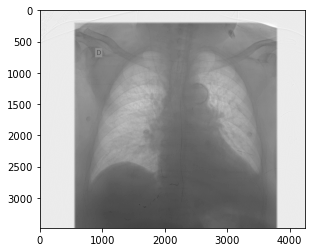

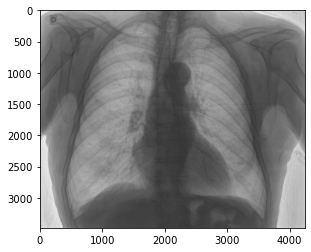

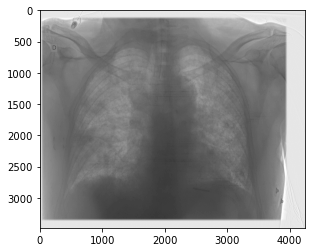

The following images are with Photometric Interpretation MONOCHROME2


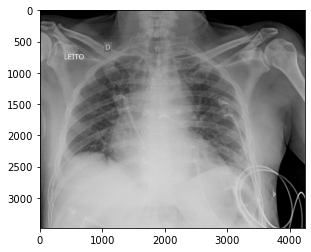

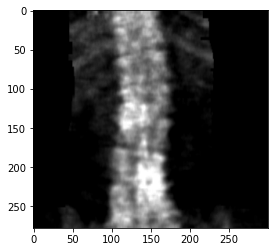

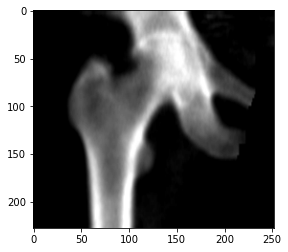

In [8]:
print(dicom_tags_train.PhotometricInterpretation.value_counts())

print('The following images are with Photometric Interpretation MONOCHROME1')
n = 0
for idx,row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME1'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

print('The following images are with Photometric Interpretation MONOCHROME2')

n = 0
for idx, row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME2'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

In [9]:
train = dicom_tags_train.merge(train, on =  'SOPInstanceUID')

In [10]:
train.head()

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target
0,D:/DATASET/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3
1,D:/DATASET/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3
2,D:/DATASET/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3
3,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3
4,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3


In [11]:
label = ['Abdomen', 'Ankle', 'Cervical Spine',
       'Chest', 'Clavicles', 'Elbow', 'Feet', 'Finger', 'Forearm', 'Hand',
       'Hip', 'Knee', 'Lower Leg', 'Lumbar Spine', 'Others', 'Pelvis',
       'Shoulder', 'Sinus', 'Skull', 'Thigh', 'Thoracic Spine', 'Wrist']

In [12]:
def no_to_label(label):
    label_list_string = []
    trimed_label = label.rstrip()
    label_list = trimed_label.split(" ")
    label_list = [int(i) for i in label_list]
    for label in label_list:
        label_list_string.append(bodyparts[label])
    label_string = ' and '.join(label_list_string)
    return label_string

# Create a new column with label
target_list = train['Target'].tolist()
label_column = []

for label in tqdm(target_list):
    label_string = no_to_label(label)
    label_column.append(label_string)
train['Label'] = label_column

#Now we can see the distribution
train['Label'].unique()

100%|██████████████████████████████████████████████████████████████████████████| 1738/1738 [00:00<00:00, 533926.64it/s]


array(['Chest', 'Hand and Wrist', 'Cervical Spine', 'Pelvis', 'Knee',
       'Wrist', 'Others', 'Finger', 'Hand', 'Feet', 'Elbow', 'Ankle',
       'Lumbar Spine and Thoracic Spine', 'Thoracic Spine',
       'Lumbar Spine', 'Abdomen', 'Skull', 'Hip', 'Shoulder',
       'Finger and Hand', 'Ankle and Knee and Lower Leg',
       'Abdomen and Chest', 'Sinus', 'Lower Leg', 'Chest and Finger',
       'Thigh', 'Ankle and Lower Leg', 'Hip and Knee and Thigh',
       'Clavicles', 'Elbow and Forearm', 'Forearm', 'Abdomen and Pelvis',
       'Ankle and Feet', 'Hip and Thigh', 'Pelvis and Thigh',
       'Knee and Lower Leg', 'Forearm and Shoulder', 'Chest and Pelvis',
       'Cervical Spine and Thoracic Spine',
       'Cervical Spine and Lumbar Spine and Thoracic Spine',
       'Chest and Feet'], dtype=object)

<AxesSubplot:xlabel='Label'>

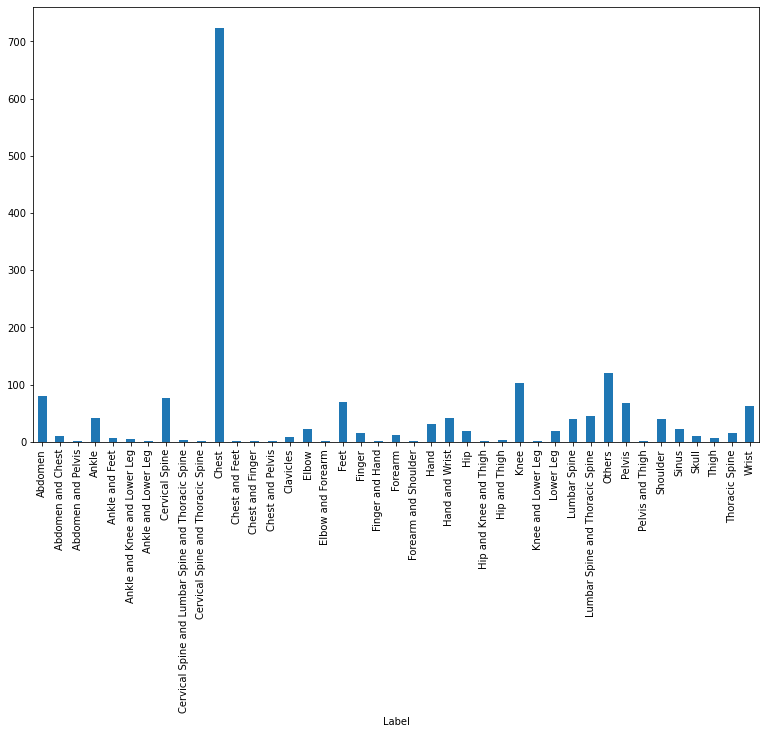

In [13]:
Grouped_target = train.groupby(by='Label').size()
%matplotlib inline
plt.rcParams["figure.figsize"] = (13,8)                              
Grouped_target.plot.bar()

In [14]:
train.Label.value_counts(normalize = True)

Chest                                                 0.416571
Others                                                0.069045
Knee                                                  0.058688
Abdomen                                               0.046030
Cervical Spine                                        0.044304
Feet                                                  0.040276
Pelvis                                                0.038550
Wrist                                                 0.036249
Lumbar Spine and Thoracic Spine                       0.025892
Hand and Wrist                                        0.024166
Ankle                                                 0.023590
Shoulder                                              0.023015
Lumbar Spine                                          0.022440
Hand                                                  0.017837
Elbow                                                 0.013234
Sinus                                                 0

In [15]:
train.Label.value_counts()

Chest                                                 724
Others                                                120
Knee                                                  102
Abdomen                                                80
Cervical Spine                                         77
Feet                                                   70
Pelvis                                                 67
Wrist                                                  63
Lumbar Spine and Thoracic Spine                        45
Hand and Wrist                                         42
Ankle                                                  41
Shoulder                                               40
Lumbar Spine                                           39
Hand                                                   31
Elbow                                                  23
Sinus                                                  23
Lower Leg                                              19
Hip           

In [16]:
v = train.Label.value_counts()
train = train[train.Label.isin(v.index[v.gt(9)])]

In [17]:
train

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label
0,D:/DATASET/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest
1,D:/DATASET/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest
2,D:/DATASET/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest
3,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest
4,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest
...,...,...,...,...,...,...
1733,D:/DATASET/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88201401328037140717...,10,Hip
1734,D:/DATASET/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88978469234834814481...,15,Pelvis
1735,D:/DATASET/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.33303514480609398517...,2,Cervical Spine
1736,D:/DATASET/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.13310561881659972417...,3,Chest


In [18]:
import pydicom as dicom
from PIL import Image, ImageOps
import os

images_path = "D:/DATASET/train_images"
ImagePath = []
file_name = train.Filename.to_list()
sop = train.SOPInstanceUID.to_list()
for file,sopId in tqdm(zip(file_name,sop)):
    ds = dicom.dcmread(file)
    normalized = ( ds.pixel_array - np.mean(ds.pixel_array) ) / np.std(ds.pixel_array)
    mat  = ( normalized + 1 ) /2
    img = Image.fromarray(np.uint8(mat * 255) , 'L')
    file_path = os.path.join(images_path,sopId+".png")
    img.save(file_path)
    ImagePath.append(file_path)
    
train['Imagepath'] = ImagePath

0it [00:00, ?it/s]C:\Users\LEEPAAKSHI\anaconda3\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
198it [07:32,  2.62s/it]C:\Users\LEEPAAKSHI\anaconda3\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
600it [22:53,  2.61s/it]C:\Users\LEEPAAKSHI\anaconda3\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
1688it [1:05:10,  2.32s/it]


In [19]:
train.head()

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,D:/DATASET/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1,D:/DATASET/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
2,D:/DATASET/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
3,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
4,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....


In [20]:
from sklearn.model_selection import train_test_split   
y = train.Label
X = train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50, stratify = X['Label'])

In [21]:
y_train.value_counts()

Chest                              652
Others                             108
Knee                                92
Abdomen                             72
Cervical Spine                      69
Feet                                63
Pelvis                              60
Wrist                               57
Lumbar Spine and Thoracic Spine     40
Hand and Wrist                      38
Ankle                               37
Shoulder                            36
Lumbar Spine                        35
Hand                                28
Sinus                               21
Elbow                               21
Hip                                 17
Lower Leg                           17
Finger                              13
Thoracic Spine                      13
Forearm                             11
Abdomen and Chest                   10
Skull                                9
Name: Label, dtype: int64

In [22]:
X_train.Label.value_counts()

Chest                              652
Others                             108
Knee                                92
Abdomen                             72
Cervical Spine                      69
Feet                                63
Pelvis                              60
Wrist                               57
Lumbar Spine and Thoracic Spine     40
Hand and Wrist                      38
Ankle                               37
Shoulder                            36
Lumbar Spine                        35
Hand                                28
Sinus                               21
Elbow                               21
Hip                                 17
Lower Leg                           17
Finger                              13
Thoracic Spine                      13
Forearm                             11
Abdomen and Chest                   10
Skull                                9
Name: Label, dtype: int64

In [23]:
X_test.Label.value_counts()

Chest                              72
Others                             12
Knee                               10
Abdomen                             8
Cervical Spine                      8
Feet                                7
Pelvis                              7
Wrist                               6
Lumbar Spine and Thoracic Spine     5
Lumbar Spine                        4
Hand and Wrist                      4
Shoulder                            4
Ankle                               4
Hand                                3
Sinus                               2
Elbow                               2
Thoracic Spine                      2
Hip                                 2
Lower Leg                           2
Finger                              2
Skull                               1
Forearm                             1
Abdomen and Chest                   1
Name: Label, dtype: int64

In [24]:
X_test

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
1493,D:/DATASET/train\train\81\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.32160902359476426830...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1695,D:/DATASET/train\train\956\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12465380284035593782...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
572,D:/DATASET/train\train\1370\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15092989485256748181...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
371,D:/DATASET/train\train\1254\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.36121912364078781887...,14,Others,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1275,D:/DATASET/train\train\643\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.85495648454557212778...,6,Feet,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
...,...,...,...,...,...,...,...
1603,D:/DATASET/train\train\886\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12657778303933552316...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1166,D:/DATASET/train\train\554\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.79789803969602271722...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
151,D:/DATASET/train\train\1115\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.10645552878898750123...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
62,D:/DATASET/train\train\104\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72558621588625374076...,0,Abdomen,D:/DATASET/train_images\1.2.826.0.1.3680043.8....


In [25]:
X_train = X_train.sort_index(ascending=True)
X_train

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,D:/DATASET/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1,D:/DATASET/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
2,D:/DATASET/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
3,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
4,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
...,...,...,...,...,...,...,...
1732,D:/DATASET/train\train\994\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.73111358555919845078...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1733,D:/DATASET/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88201401328037140717...,10,Hip,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1735,D:/DATASET/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.33303514480609398517...,2,Cervical Spine,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1736,D:/DATASET/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.13310561881659972417...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....


In [26]:
y_train = y_train.sort_index(ascending=True)
y_train

0                Chest
1                Chest
2                Chest
3                Chest
4                Chest
             ...      
1732             Chest
1733               Hip
1735    Cervical Spine
1736             Chest
1737            Pelvis
Name: Label, Length: 1519, dtype: object

In [27]:
X_test = X_test.sort_index(ascending=True)
X_test

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
6,D:/DATASET/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
20,D:/DATASET/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
29,D:/DATASET/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
37,D:/DATASET/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
40,D:/DATASET/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
...,...,...,...,...,...,...,...
1693,D:/DATASET/train\train\955\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.46995447179630810082...,13 20,Lumbar Spine and Thoracic Spine,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1695,D:/DATASET/train\train\956\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12465380284035593782...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1711,D:/DATASET/train\train\970\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11142749741335643457...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1715,D:/DATASET/train\train\973\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.20287656812819582539...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....


In [28]:
y_test = y_test.sort_index(ascending=True)
y_test

6                        Hand and Wrist
20                                Wrist
29                                 Knee
37                                 Knee
40                                Wrist
                     ...               
1693    Lumbar Spine and Thoracic Spine
1695                              Chest
1711                              Chest
1715                              Chest
1734                             Pelvis
Name: Label, Length: 169, dtype: object

In [29]:
y=set(X_train.Label)

In [30]:
y=list(y)

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [32]:
z=le.transform(X_train.Label)

In [33]:
X_train['enum']=z

In [34]:
len(X_train)

1519

In [35]:
X_train.head(10)

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,D:/DATASET/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
1,D:/DATASET/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
2,D:/DATASET/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
3,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
4,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
5,D:/DATASET/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
7,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
8,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,3
9,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,17
10,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,12


In [36]:
X_train = X_train.reset_index()
X_train.head(10)

,index,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,D:/DATASET/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
1,1,D:/DATASET/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
2,2,D:/DATASET/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
3,3,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
4,4,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
5,5,D:/DATASET/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
6,7,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
7,8,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,3
8,9,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,17
9,10,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,12


In [37]:
X_train.head(10)

,index,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,D:/DATASET/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
1,1,D:/DATASET/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
2,2,D:/DATASET/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
3,3,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
4,4,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
5,5,D:/DATASET/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
6,7,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
7,8,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,3
8,9,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,17
9,10,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,12


In [38]:
y_train = y_train.reset_index()
y_train.drop(['index'], axis = 1, inplace = True)
y_train.head(10)

,Label
0,Chest
1,Chest
2,Chest
3,Chest
4,Chest
5,Chest
6,Chest
7,Cervical Spine
8,Pelvis
9,Knee


In [39]:
X_test = X_test.reset_index()
X_test.drop(['index'], axis = 1, inplace = True)
X_test.head(10)

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,D:/DATASET/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
1,D:/DATASET/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
2,D:/DATASET/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
3,D:/DATASET/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
4,D:/DATASET/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
5,D:/DATASET/train\train\1032\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59175237101901597342...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
6,D:/DATASET/train\train\1032\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.50936077508977170899...,13 20,Lumbar Spine and Thoracic Spine,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
7,D:/DATASET/train\train\104\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72558621588625374076...,0,Abdomen,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
8,D:/DATASET/train\train\1041\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78092589205812056556...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....
9,D:/DATASET/train\train\1055\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.49042641191949792629...,0,Abdomen,D:/DATASET/train_images\1.2.826.0.1.3680043.8....


In [40]:
y_test = y_test.reset_index()
y_test.drop(['index'], axis = 1, inplace = True)
y_test.head(10)

,Label
0,Hand and Wrist
1,Wrist
2,Knee
3,Knee
4,Wrist
5,Chest
6,Lumbar Spine and Thoracic Spine
7,Abdomen
8,Chest
9,Abdomen


In [41]:
d = []

In [42]:
for i in range(len(X_train)):
    d.append(((X_train.Imagepath[i],int(X_train.enum[i]))))
    

In [43]:
type(z)

numpy.ndarray

In [44]:
X_train.enum

0        4
1        4
2        4
3        4
4        4
        ..
1514     4
1515    11
1516     3
1517     4
1518    17
Name: enum, Length: 1519, dtype: int32

In [45]:
d

[('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109.png',
  4),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png',
  4),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.57792439353439709695715592578627325770.png',
  4),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.37634180084111795685928688942145555908.png',
  4),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.12781870272366327239431992873991536152.png',
  4),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.47572155867413808436639828301877907300.png',
  4),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.15916540756113733490766234439378064771.png',
  4),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.18487623914375706231172360173248146829.png',
  3),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.78401161739580676973623271087262413160.png',
  17),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.

In [46]:
X_train.head()

,index,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,D:/DATASET/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
1,1,D:/DATASET/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
2,2,D:/DATASET/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
3,3,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
4,4,D:/DATASET/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4


In [47]:
X_train.Imagepath[1]

'D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png'

In [48]:
y = le.transform(X_test.Label)

In [49]:
y

array([10, 22, 12, 12, 22,  4, 15,  0,  4,  0,  0, 18,  3,  4,  4,  4,  0,
        4,  4,  4, 17,  4, 13,  4, 13, 16, 17,  4,  4,  2,  2, 12, 12, 18,
       16, 17,  4,  7, 14,  4, 19,  4, 19, 11,  0,  4,  4,  4,  4,  3,  4,
        4,  4,  4,  4,  7, 22, 12, 21, 21,  4,  0,  9, 11,  4,  4, 16,  4,
        5,  4,  4,  3,  6, 16,  4,  4, 12,  4, 12, 14, 16,  4, 15,  4,  4,
        3, 15,  3,  4, 16,  9, 17, 12,  4,  3, 16,  4, 22,  6,  6,  4,  5,
        4, 12, 18,  4,  4,  4, 14, 18,  4, 10,  4,  4,  4,  8,  4, 14,  2,
       16,  9,  4,  6,  4,  4,  3, 17, 16, 12,  6,  1, 20, 10,  4,  4,  3,
        4, 10, 15,  4, 16, 16,  4, 22,  4, 22,  4,  4,  4,  4,  4,  0,  4,
        4, 16,  6,  4, 17,  2,  4,  0,  4,  4,  6, 15,  4,  4,  4, 17])

In [50]:
X_test["enum"] = y

In [51]:
X_test

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,D:/DATASET/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,10
1,D:/DATASET/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,22
2,D:/DATASET/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,12
3,D:/DATASET/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,12
4,D:/DATASET/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,22
...,...,...,...,...,...,...,...,...
164,D:/DATASET/train\train\955\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.46995447179630810082...,13 20,Lumbar Spine and Thoracic Spine,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,15
165,D:/DATASET/train\train\956\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12465380284035593782...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
166,D:/DATASET/train\train\970\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11142749741335643457...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4
167,D:/DATASET/train\train\973\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.20287656812819582539...,3,Chest,D:/DATASET/train_images\1.2.826.0.1.3680043.8....,4


In [52]:
c = []
for i in range(len(X_test)):
    c.append(((X_test.Imagepath[i],int(X_test.enum[i]))))
    
c 

[('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.75243637122822422802803455060201037925.png',
  10),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.12961416485268413761806036241048442495.png',
  22),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.99227641053114131427351369098512621609.png',
  12),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.72908203752062511272415279481353711219.png',
  12),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.59409306263004590952837909835388739702.png',
  22),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.59175237101901597342696020015488943651.png',
  4),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.50936077508977170899728065708413429534.png',
  15),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.72558621588625374076289057954754895994.png',
  0),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8.498.78092589205812056556071639089171997738.png',
  4),
 ('D:/DATASET/train_images\\1.2.826.0.1.3680043.8

In [53]:
image_paths, y_train = zip(*d)
image_paths_test, y_test = zip(*c)

In [54]:
des_list=[]

In [55]:
sift=cv2.SIFT_create(50)

In [56]:
im=cv2.imread(image_paths[1])

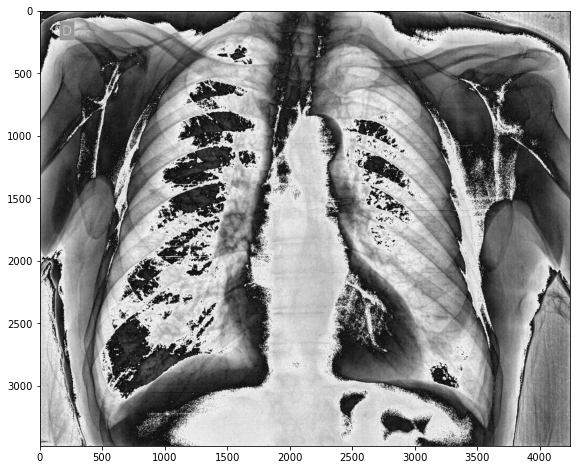

In [57]:
plt.imshow(im)

In [58]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

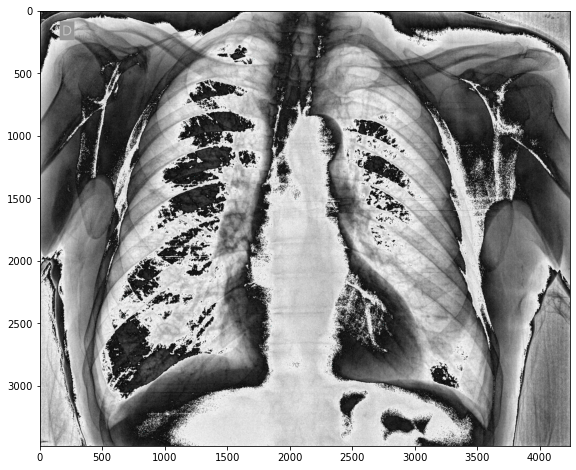

In [59]:
kp = sift.detect(im,None)
kp, des = sift.compute(im, kp)
img=draw_keypoints(im,kp)

In [60]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=sift.detect(im,None)
    keypoints,descriptor= sift.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [61]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [62]:
descriptors.shape

(77020, 128)

In [63]:
descriptors_float=descriptors.astype(float)

In [64]:
from scipy.cluster.vq import kmeans,vq

In [65]:
k=200
voc,variance=kmeans(descriptors_float,k,1)

In [66]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [67]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [68]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=80000)

In [69]:
des_list_test=[]

In [70]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=sift.detect(image,None)
    keypoints_test,descriptor_test= sift.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [71]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [72]:
test_features

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [73]:
test_features=stdslr.transform(test_features)

In [74]:
y_test

(10,
 22,
 12,
 12,
 22,
 4,
 15,
 0,
 4,
 0,
 0,
 18,
 3,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 17,
 4,
 13,
 4,
 13,
 16,
 17,
 4,
 4,
 2,
 2,
 12,
 12,
 18,
 16,
 17,
 4,
 7,
 14,
 4,
 19,
 4,
 19,
 11,
 0,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 7,
 22,
 12,
 21,
 21,
 4,
 0,
 9,
 11,
 4,
 4,
 16,
 4,
 5,
 4,
 4,
 3,
 6,
 16,
 4,
 4,
 12,
 4,
 12,
 14,
 16,
 4,
 15,
 4,
 4,
 3,
 15,
 3,
 4,
 16,
 9,
 17,
 12,
 4,
 3,
 16,
 4,
 22,
 6,
 6,
 4,
 5,
 4,
 12,
 18,
 4,
 4,
 4,
 14,
 18,
 4,
 10,
 4,
 4,
 4,
 8,
 4,
 14,
 2,
 16,
 9,
 4,
 6,
 4,
 4,
 3,
 17,
 16,
 12,
 6,
 1,
 20,
 10,
 4,
 4,
 3,
 4,
 10,
 15,
 4,
 16,
 16,
 4,
 22,
 4,
 22,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 16,
 6,
 4,
 17,
 2,
 4,
 0,
 4,
 4,
 6,
 15,
 4,
 4,
 4,
 17)

In [75]:
y_pred=clf.predict(test_features)

In [76]:
y_pred

array([ 4, 16,  4,  2,  8,  9, 15,  4, 14,  4,  2, 15,  4,  4, 10,  4, 22,
        4,  3,  4,  4,  4,  4,  7, 15,  4, 14, 13,  4,  3, 15,  3, 18,  6,
        4,  4,  9, 10,  4,  4,  4, 15,  6,  6,  4,  4,  6,  3, 11, 19, 17,
       15,  5,  4,  4, 14, 16,  4,  4, 22,  4, 15,  4, 16, 10,  4, 13,  4,
       15, 14,  4, 18,  2, 22,  8,  0,  4,  4, 11, 16, 16,  4,  4,  2,  4,
        4, 16,  3,  4, 16,  1, 22, 22,  4,  6, 19, 16, 22, 15, 16, 15, 10,
        5, 14,  6, 10,  4, 10,  4, 20, 10,  4, 19,  4,  4,  4, 19, 19, 22,
       16,  6, 14,  4, 16,  4, 15, 18, 16, 17,  4,  4,  0, 16,  4,  4,  4,
        3,  4, 22, 19,  2, 17, 19, 22,  4,  6, 15, 15, 10,  2, 15, 12,  4,
       16, 16, 16,  4,  4, 10,  4,  4,  9,  4, 22, 22,  4,  6, 14,  4])

In [77]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.23668639053254437


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.17      0.12      0.14         8
           4       0.51      0.43      0.47        72
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.07      0.20      0.11         5
          16       0.31      0.42      0.36        12
          17       0.00    

C:\Users\LEEPAAKSHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEEPAAKSHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEEPAAKSHI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
